In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r'C:\Users\Lenovo\Documents\Bank Loan/Bank Loan Analysis Dataset.xlsx',1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Preparing Data

In [3]:
df.shape

(5000, 14)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
#Removing ID and ZIP Code as they are not much useful in this analysis

df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [7]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

## Exploratory Data Analysis

In [8]:
import plotly.express as px

In [10]:
fig=px.box(df,y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

#### The box plot suggests that Experience has negative value (This should be fixed).
    we can see the Min, Max, mean and std deviation for all key attributes of the dataset
    Income has too much noise and slightly skewed right, Age and Experience are equally distributed.

## Checking Skewness in data

In [11]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [12]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### now visualise Skewness by distribution

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

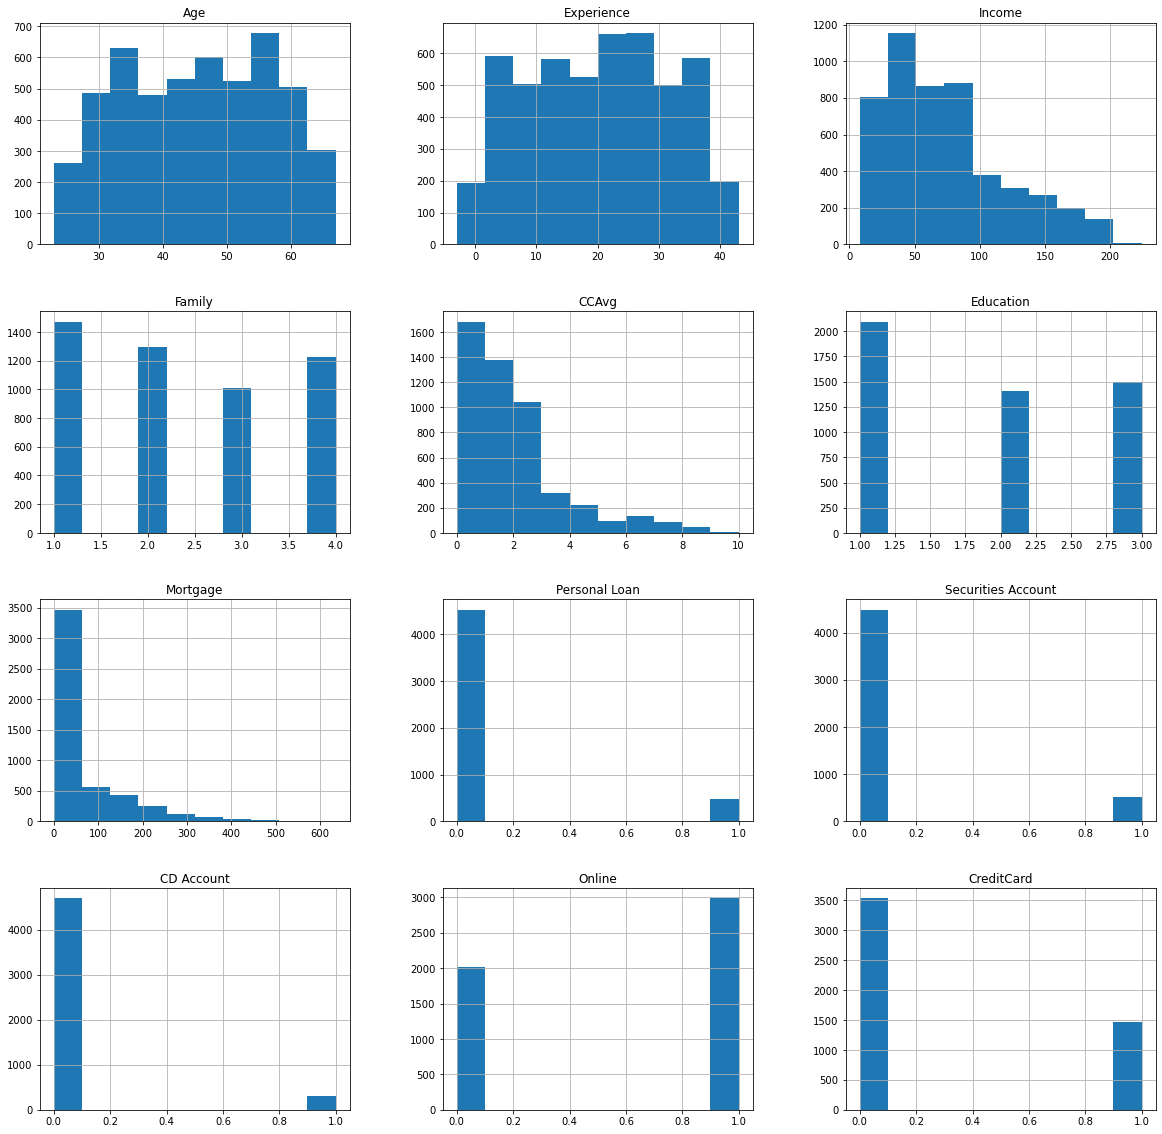

In [13]:
df.hist(figsize=(20,20))

#### INFERENCE from Histogram
    1.Age & Experience are to an extent equally distributed
    2.Income & Credit card spending are skewed to the left
    3.We have more Undergraduates than Graduate and Advanced & Professional
    4.60% of customers have enabled online banking and went digital

In [14]:
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Experience', ylabel='Density'>

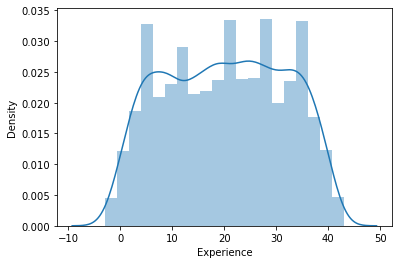

In [15]:
sns.distplot(df['Experience'])

In [16]:
df['Experience'].mean()

20.1046

In [17]:
Negative_exp=df[df['Experience']<0]
Negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

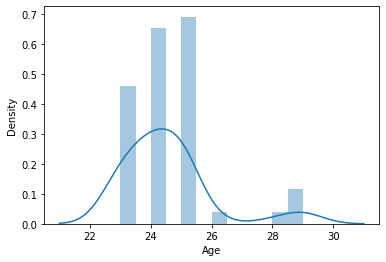

In [18]:
sns.distplot(Negative_exp['Age'])

In [19]:
Negative_exp['Experience'].mean()

-1.4423076923076923

In [20]:
Negative_exp.size

624

In [21]:
print('There are {} records which has negative values for experience, approx {} %'.format(Negative_exp.size , ((Negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [22]:
data=df.copy()

In [23]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [24]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [26]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


<AxesSubplot:>

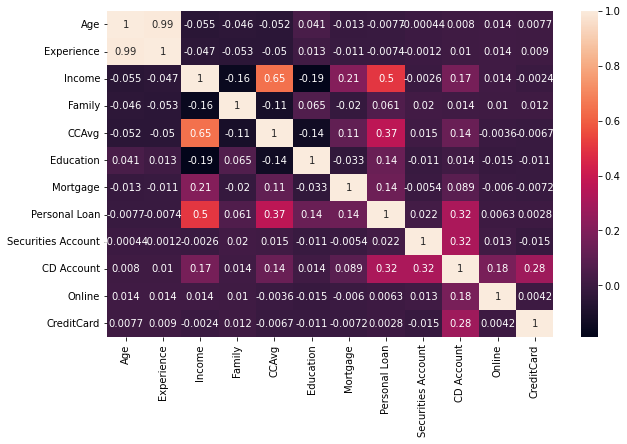

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

#### We can see that Age & Experience are very strongly correlated,
#### Hence it is fine for us to go with either to  avoid multi-colinearity issue.

In [28]:
data=data.drop(['Experience'],axis=1)

In [29]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [30]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [31]:
def mark(x):
    if x==1:
        return 'Undergrad'
    elif x==2:
        return 'Graduate'
    else:
        return 'Advanced/Professional'

In [32]:
data['Edu_mark']=data['Education'].apply(mark)

In [33]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [34]:
EDU_dis=data.groupby('Edu_mark')['Age'].count()

In [35]:
EDU_dis

Edu_mark
Advanced/Professional    1501
Graduate                 1403
Undergrad                2096
Name: Age, dtype: int64

In [36]:
fig=px.pie(data,values=EDU_dis, names=EDU_dis.index,title='Pie CHart')
fig.show()

#### Inference : We can see that we have more Undergraduates( 41.92%) than graduates(28.06%) and  Advanced Professionals(30.02%)

In [37]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark'],
      dtype='object')

####  Account Holder's distribution

In [38]:
def Security_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return 'Holds Securites & Deposit'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
        return 'Does not Holds Securites or Deposit'
    elif (row['Securities Account']==1) & (row['CD Account']==0):
        return ' Holds only Securites '
    elif (row['Securities Account']==0) & (row['CD Account']==1):
        return ' Holds only Deposit'
    

In [39]:
data['Account_holder_category']=data.apply(Security_CD,axis=1)

In [40]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad,Holds only Securites
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad,Holds only Securites
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad,Does not Holds Securites or Deposit
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not Holds Securites or Deposit
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not Holds Securites or Deposit


In [41]:
values=data['Account_holder_category'].value_counts()
values.index

Index(['Does not Holds Securites or Deposit', ' Holds only Securites ',
       ' Holds only Deposit', 'Holds Securites & Deposit'],
      dtype='object')

In [42]:
fig=px.pie(data,values=values, names=values.index,title='Pie CHart')
fig.show()

#### We could see that alomst 87% of customers do not hold any securities or deposit, and 3 % hold both securities as well as deposit. It will be good if we can encourage those 87% to open any of these accounts as it will improve the assests of the bank.

In [43]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

In [44]:
px.box(data,x='Education',y='Income',facet_col='Personal Loan')

#### Inference:From the above plot we could say that Income of customers who availed personal loan are alomst same irrescpective of their Education

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



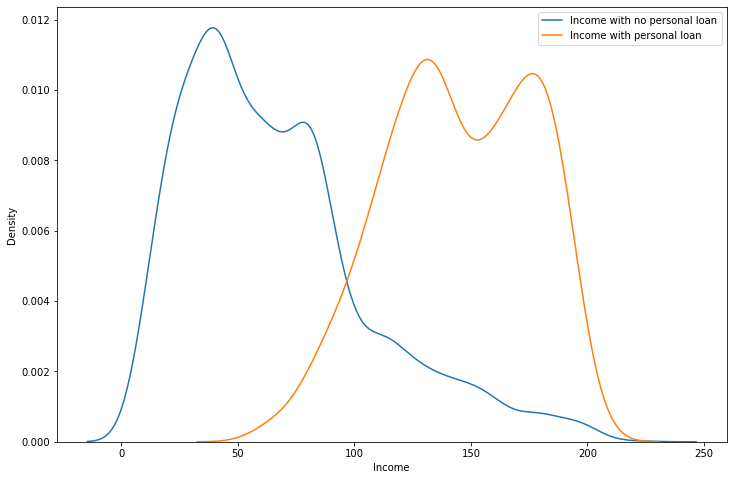

In [45]:
plt.figure(figsize=(12,8))
sns.distplot(data[data['Personal Loan']==0]['Income'],hist=False,label='Income with no personal loan')
sns.distplot(data[data['Personal Loan']==1]['Income'],hist=False,label='Income with personal loan')
plt.legend()

#### Conclusion: Customers Who have availed personal loan seem to have higher income than those who do not have personal loan

## Automating

In [46]:
def plot(col1,col2,label1,label2,title):
    plt.figure(figsize=(12,8))
    sns.distplot(data[data[col2]==0][col1],hist=False,label=label1)
    sns.distplot(data[data[col2]==1][col1],hist=False,label=label2)
    plt.legend()
    plt.title(title)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



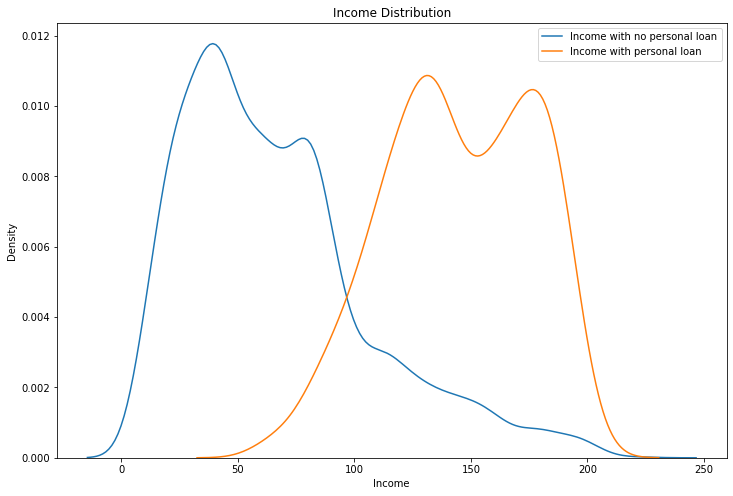

In [47]:
plot('Income','Personal Loan','Income with no personal loan','Income with personal loan','Income Distribution')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



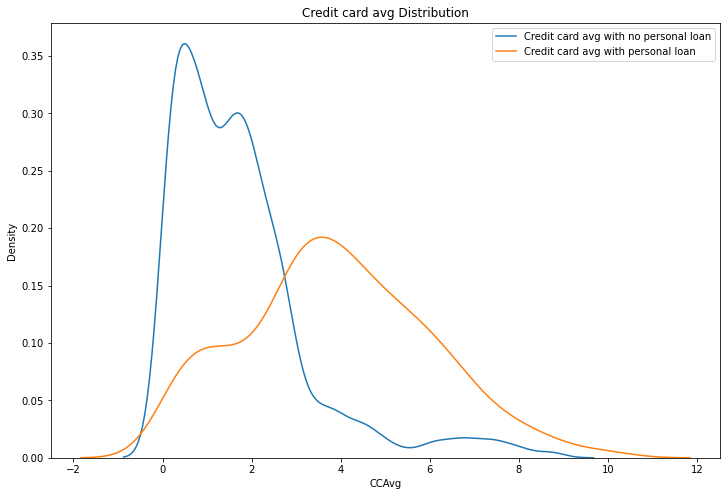

In [48]:
plot('CCAvg','Personal Loan','Credit card avg with no personal loan','Credit card avg with personal loan','Credit card avg Distribution')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



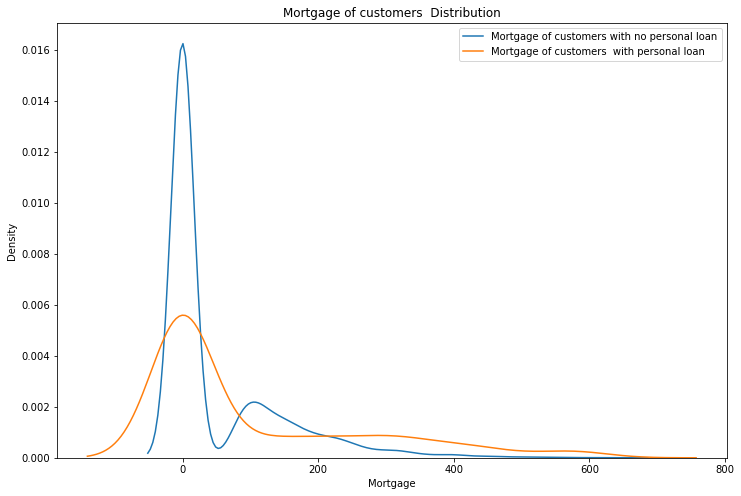

In [49]:
plot('Mortgage','Personal Loan','Mortgage of customers with no personal loan','Mortgage of customers  with personal loan','Mortgage of customers  Distribution')

#### People with high mortgage value i.e more than 400K have availed personal Loan

In [50]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

In [51]:
col_names=['Securities Account','Online','Account_holder_category','CreditCard']


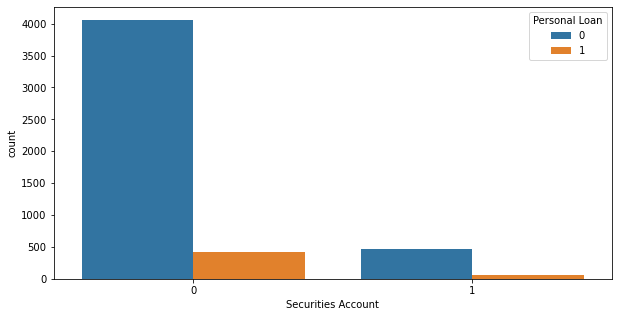

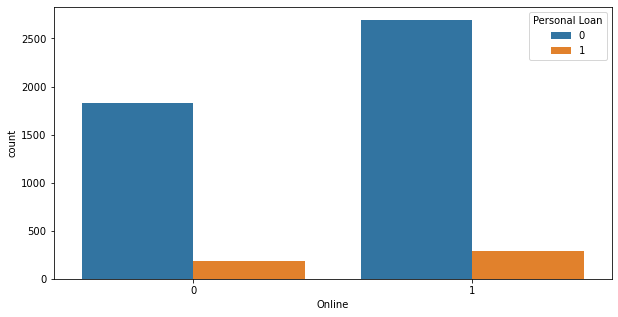

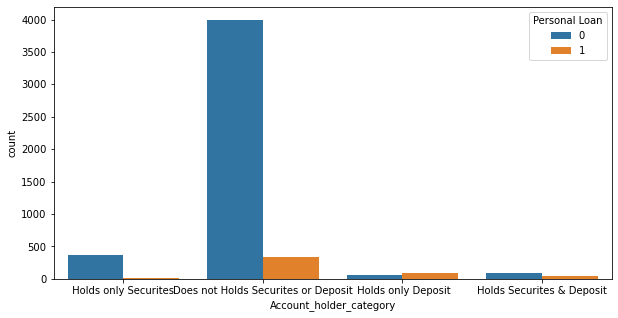

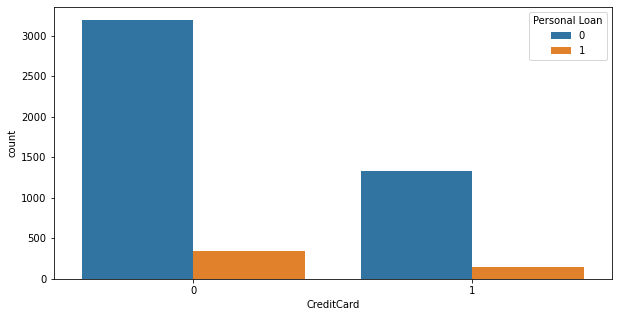

In [52]:
for i in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,hue='Personal Loan',data=data)

#### From the above graph we could infer that , customers who hold deposit account & customers who do not hold either a securities account or deposit account have availed personal loan

## Perform Hypothesis Testing

## Problem Statements
### How is the age of a person going to be a factor in availing loan?
### Does Income of a person have an impact on availing loan ?
### Does the family size cause people to take loans?


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

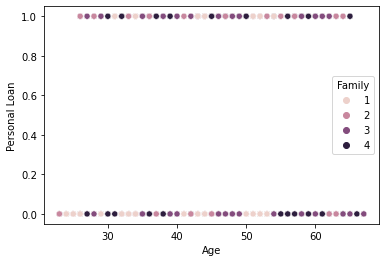

In [53]:
sns.scatterplot(data['Age'],data['Personal Loan'],hue=data['Family'])

In [54]:
import scipy.stats as stats

In [55]:
Ho='Age does not have impact on availing personal loan'
Ha='Age does  have impact on availing personal loan'

In [56]:
Age_no=np.array(data[data['Personal Loan']==0]['Age'])
Age_yes=np.array(data[data['Personal Loan']==1]['Age'])

In [57]:
t,p_value=stats.ttest_ind(Age_no,Age_yes,axis=0)
if p_value<0.05:
    print(Ha,' as the p_value is less than 0.05 with a value of {}'.format(p_value))
else:
    print(Ho,' as the p_value is greater than 0.05 with a value of {}'.format(p_value))

Age does not have impact on availing personal loan  as the p_value is greater than 0.05 with a value of 0.584959263705325


#### Automating

In [58]:
def Hypothesis(col1,col2,HO,Ha):
    arr1=np.array(data[data[col1]==0][col2])
    arr2=np.array(data[data[col1]==1][col2])
    t,p_value=stats.ttest_ind(arr1,arr2,axis=0)
    if p_value<0.05:
        print('{}, as the p_value is less than 0.05 with a value of {}'.format(Ha,p_value))
    else:
        print('{} as the p_value is greater than 0.05 with a value of {}'.format(HO,p_value))

In [59]:
Hypothesis('Personal Loan','Age',HO='Age does not have impact on availing personal loan',Ha='Age does  have impact on availing personal loan')

Age does not have impact on availing personal loan as the p_value is greater than 0.05 with a value of 0.584959263705325


### Does the income of a person has a significant role in availing loan?

In [60]:
Hypothesis(col1='Personal Loan',col2='Income',HO='Income does not have impact on availing personal loan',Ha='Income does  have impact on availing personal loan')

Income does  have impact on availing personal loan, as the p_value is less than 0.05 with a value of 0.0


#### Income have phenomenal significance on availing personal Loan , As the P_value is less than 0.05 with a value of :0.0

### Does the family size have a significant role in availing personal loan?

In [61]:
Hypothesis('Personal Loan','Family',HO='AgFamily does not have impact on availing personal loan',Ha='Family does  have impact on availing personal loan')

Family does  have impact on availing personal loan, as the p_value is less than 0.05 with a value of 1.4099040685673807e-05


#### Family have phenomenal significance on availing personal Loan , As the P_value is less than 0.05 with a value of :1.4099040685673807e-05